<a href="https://colab.research.google.com/github/Ductrinh01/AI_Exercises_CNN/blob/main/BT_dogvscat_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

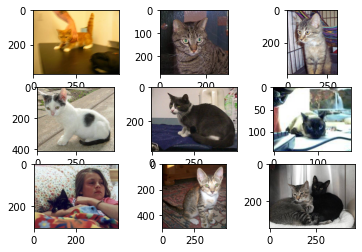

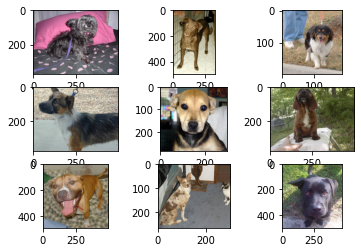

In [22]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
folder1= '/content/drive/MyDrive/Data_AI/train/cats/'

for i in range(9):
  plt.subplot(330+i+1)
  filename = folder1+'cat.'+str(i)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()
folder2= '/content/drive/MyDrive/Data_AI/train/dogs/'
for i in range(9):
  plt.subplot(330+i+1)
  filename = folder2+'dog.'+str(i)+'.jpg'
  image = imread(filename)
  plt.imshow(image)
plt.show()

In [66]:
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array

folder = '/content/drive/MyDrive/Data_AI/dogs_vs_cats/'

photos, labels = list(), list()
for file in listdir(folder):
  output = 0
  if file.startswith('cat'):
    output = 1.0
  photo = load_img(folder + file, target_size=(200,200))
  photo = img_to_array(photo)  # O dong nay anh da bi thay doi.
  photos.append(photo)
  labels.append(output)
photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
# print(photos, labels)

save('dog_vs_cat_photos.npy', photos)
save('dog_vs_cat_labels.npy', labels)

(1504, 200, 200, 3) (1504,)


In [67]:
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten # BatchNormalization: để dùng GPU ko lỗi

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(200, 200, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


In [68]:
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])  # Output chỉ có dog hoặc cat (0 hoặc 1) nên dùng binary_crossentropy, nếu nhiều output dùng categorical_crossentropy?
history = model.fit(photos, labels, epochs=50, verbose=1)

Epoch 1/50
47/47 [==============================] - 3s 48ms/step - loss: 500.8523 - accuracy: 0.6057
Epoch 2/50
47/47 [==============================] - 2s 46ms/step - loss: 0.5258 - accuracy: 0.7613
Epoch 3/50
47/47 [==============================] - 2s 47ms/step - loss: 0.3108 - accuracy: 0.8697
Epoch 4/50
47/47 [==============================] - 2s 47ms/step - loss: 0.2203 - accuracy: 0.9176
Epoch 5/50
47/47 [==============================] - 2s 47ms/step - loss: 0.1545 - accuracy: 0.9535
Epoch 6/50
47/47 [==============================] - 2s 47ms/step - loss: 0.1132 - accuracy: 0.9668
Epoch 7/50
47/47 [==============================] - 2s 47ms/step - loss: 0.0902 - accuracy: 0.9767
Epoch 8/50
47/47 [==============================] - 2s 47ms/step - loss: 0.1062 - accuracy: 0.9681
Epoch 9/50
47/47 [==============================] - 2s 47ms/step - loss: 0.0722 - accuracy: 0.9781
Epoch 10/50
47/47 [==============================] - 2s 51ms/step - loss: 0.0466 - accuracy: 0.9920
Epoch 1

In [69]:
model.save('Final.h5')

In [70]:
from keras.models import load_model
model=load_model('Final.h5')

In [71]:
model.evaluate(photos,labels)

47/47 [==============================] - 1s 25ms/step - loss: 7.0392e-05 - accuracy: 1.0000


[7.039202318992466e-05, 1.0]

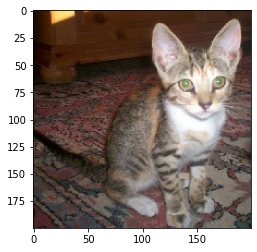

In [86]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('../content/drive/MyDrive/Data_AI/dogs_vs_cats/cat.7.jpg', target_size=(200,200))
plt.imshow(img)

In [87]:
import numpy as np
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,200,200,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
if(y_pred > 0.5):
  pred = 'cat'
else:
  pred = 'dog'
pred

[[0.5344845]]


'cat'